# Analysis of Ford GoBike System Data

## by Ifunanya Obieli

# Investigation Overview
For the investigation, I wanted to get an understanding of bike rides in San Francisco Bay Area. The aim was to use visualization and plots to explore the dataset and then communicate findings and insights gotten from the exploration.


# Dataset Overview
Dataset includes information about individual rides made in a bikesharing system covering the greater San Francisco Bay area for the month of February 2019. The dataset contains 183412 rows and 16 columns. Dataset can be found [here](https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv). 

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df_ford = pd.read_csv('/Users/ifunanya/Downloads/201902-fordgobike-tripdata.csv')
df_ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df = df_ford.copy()
#changing datatype
n_dtype = {'start_time' : 'datetime64',
          'end_time' : 'datetime64',
          'user_type' : 'category',
          'member_gender' : 'category'}

df = df.astype(n_dtype)
#dropping columns
cols_to_drop = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']
df.drop(cols_to_drop, axis = 1, inplace = True)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes


## Distribution of Trip Durations

The range of values in this dataset is very wide and had to be transformed to a log scale to get more clarity. We see a right skewed distribution showing that most trips were under 2000 seconds.

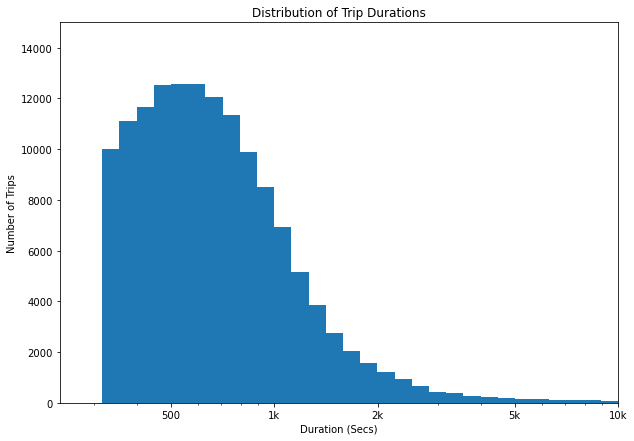

In [4]:
#getting more details from a log scale
log_binsize = 0.05
bins_log = 10 ** np.arange(2.5, np.log10(df['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[10, 7])
plt.hist(data = df, x = 'duration_sec', bins = bins_log)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (Secs)')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])
plt.show()

## DIstribution of User's Age

Most users fall between ages 18 - 75 with peak age being between 32 and 34. As age increases after 34, we see a decline in the number of trips taken per age band.

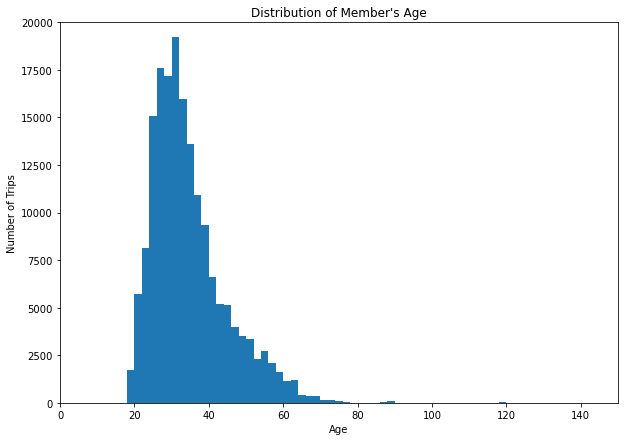

In [5]:
df['member_age'] = 2019 - df['member_birth_year']
binsize = 2
bins = np.arange(0, df['member_age'].max()+binsize, binsize)

plt.figure(figsize=[10, 7])
plt.hist(data = df, x = 'member_age', bins = bins)
plt.title("Distribution of Member's Age")
plt.xlabel('Age')
plt.ylabel('Number of Trips')
plt.axis([0, 150, 0, 20000])
plt.show()

## Comparison of Bike Users
- Over 89% of users are subscribers and just about 10% of them are customers.

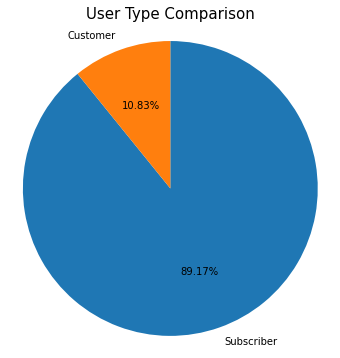

In [6]:
#by percentage
plt.figure(figsize=(10,6))
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('User Type Comparison', fontsize=15);

## Service usage by User Type
- Customers generally have more trip duration times than subscribers.
- Thursday is the start day with the highest number of trips for both customers and subscribers
- Peak time is same for both subscribers and customers 
- Subscribers have more constant duration times than customers

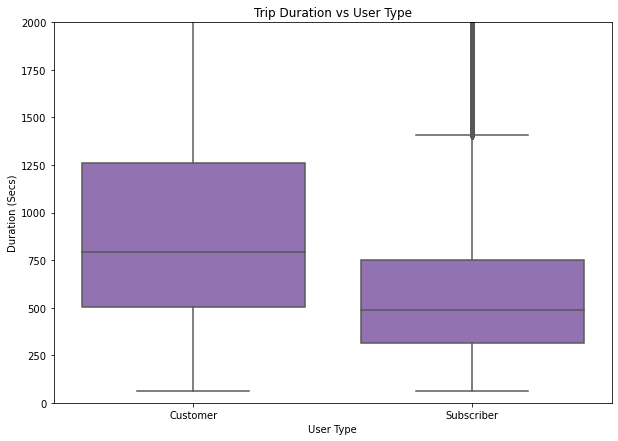

In [7]:
base_color =  sns.color_palette()[4]
df['hour'] = df['start_time'].dt.hour
df['start_day'] = df['start_time'].dt.day_name()
df['month'] = df['start_time'].dt.month_name()

plt.figure(figsize = [10, 7])
sns.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([0, 2000])
plt.title('Trip Duration vs User Type')
plt.xlabel('User Type')
plt.ylabel('Duration (Secs)')
plt.show()

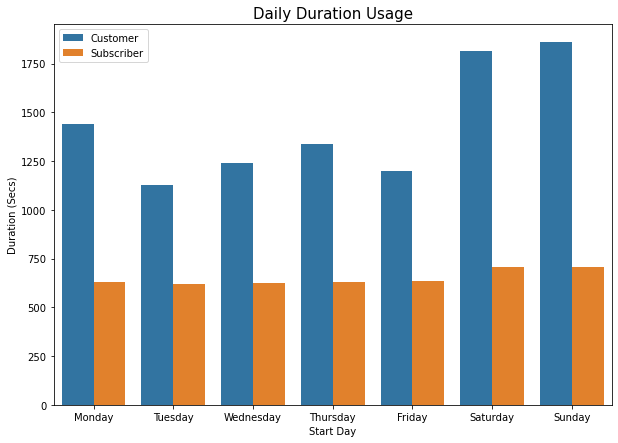

In [8]:
day_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

plt.figure(figsize=(10,7))
plt.title('Daily Duration Usage', fontsize=15)
chart = sns.barplot(data=df, x='start_day', y='duration_sec', order=day_labels, hue='user_type', ci=None)

chart.set(xlabel='Start Day', ylabel='Duration (Secs)')

# Remove legend title
plt.gca().legend().set_title('');

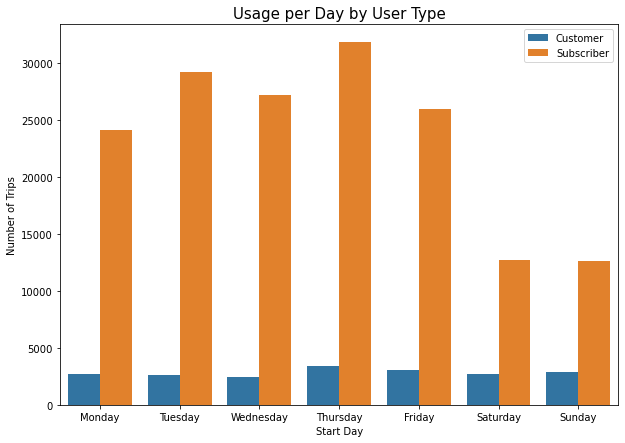

In [9]:
day_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(10,7))
plt.title('Usage per Day by User Type', fontsize=15)
chart = sns.countplot(data=df, x='start_day', order=day_labels, hue='user_type')

chart.set(xlabel='Start Day', ylabel = 'Number of Trips')

# Remove title of legend
plt.gca().legend().set_title('');

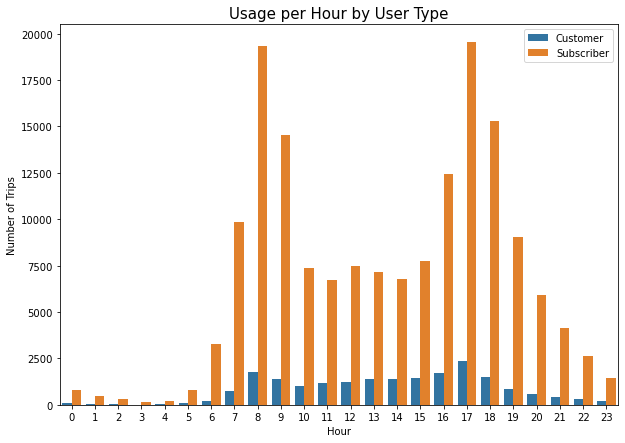

In [10]:
order_hour = np.arange(0,24)
plt.figure(figsize=(10,7))
plt.title('Usage per Hour by User Type', fontsize=15)
chart = sns.countplot(data=df, x='hour', order = order_hour, hue='user_type')

chart.set(xlabel='Hour', ylabel = 'Number of Trips')

# Remove title of legend
plt.gca().legend().set_title('');

## Popularity of Train Stations

- Most popular start station is Market St at 10th St
- Most popular end station is SanFrancisco Caltrain Station 2

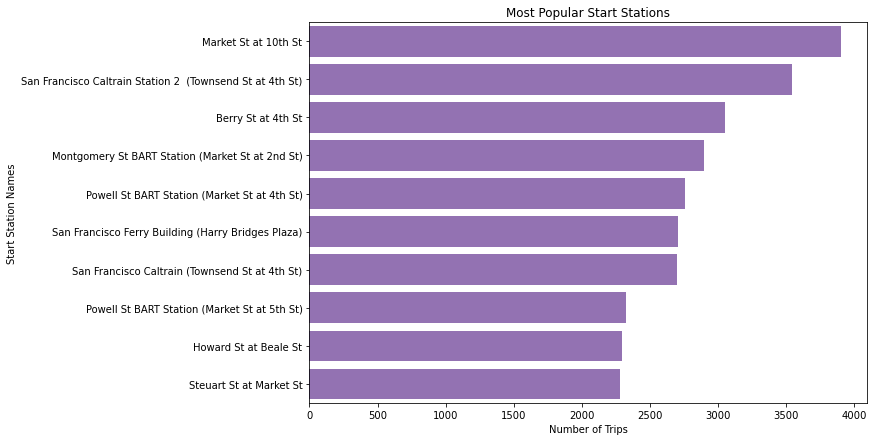

In [11]:
#start station names
start_stations = df['start_station_name'].value_counts().index[:10]
plt.figure(figsize=[10,7])
sns.countplot(data = df, y = 'start_station_name', color = base_color, order = start_stations);
plt.xlabel('Number of Trips')
plt.ylabel('Start Station Names')
plt.title('Most Popular Start Stations');

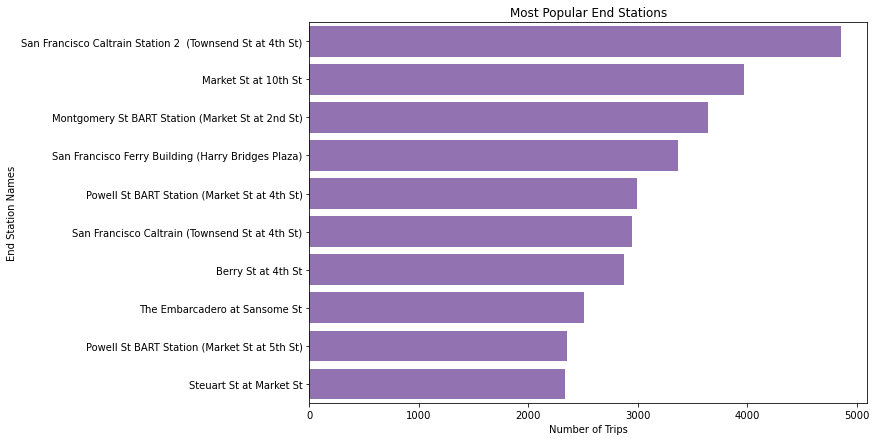

In [12]:
#end station names
end_stations = df['end_station_name'].value_counts().index[:10]
plt.figure(figsize=[10,7])
sns.countplot(data = df, y = 'end_station_name', color = base_color, order = end_stations);
plt.xlabel('Number of Trips')
plt.ylabel('End Station Names')
plt.title('Most Popular End Stations');